<a href="https://colab.research.google.com/github/MariaCamilaPatinoJaramillo/Signal-3/blob/main/Miniproyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Miniproyecto 1 Modelos de Variable Latente para el Reconocimiento de Acciones Motoras

* **Maria Camila Patiño Jaramillo**

* **Jesus David Restrepo Martinez**

* **Daniel Arturo Vega Hernandez**


**Tratamiento de Señales III**

*Universidad de Antioquia*

*Prof. Hernán Felipe García Arias, PhD*

2021-2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [ ]:
ruta = '/content/drive/MyDrive/Miniproyecto-Señales3/Miniproyecto2/DataFrameB.csv'

matriz_completa = pd.read_csv(ruta)

print(matriz_completa)

               RMS       MAE         P1         P2         P3         P4  \
0     9.640368e-16  0.124181 -24.510315 -24.113682 -22.973331 -22.668456   
1     7.222425e-17  0.140894 -22.066990 -21.769165 -21.027955 -20.872663   
2     3.768222e-16  0.137592 -22.633787 -22.579174 -21.904142 -21.901437   
3     8.729714e-16  0.159535 -21.146537 -21.044106 -20.848960 -20.630571   
4     7.662051e-16  0.178562 -19.884666 -19.147033 -18.817477 -18.761468   
...            ...       ...        ...        ...        ...        ...   
1129  5.514165e-15  0.315701 -19.789814 -18.026123 -14.557632 -10.500420   
1130  2.600073e-15  0.325574 -24.162934 -20.242869 -18.705906  -9.839973   
1131  2.951774e-16  0.285869 -21.530284 -20.368430 -18.222016 -12.845350   
1132  8.415696e-16  0.304854 -20.820466 -20.052932 -18.654113 -12.185909   
1133  5.181305e-15  0.291782 -19.131184 -19.110493 -17.774695 -11.694083   

             P5          F1          F2          F3  ...  Percentil 5 w_1_1  \
0    -20

In [ ]:

 
Nombres = ['RMS','MAE','P1','P2','P3','P4','P5','F1','F2','F3','F4','F5','Num Cruces Por Cero','Entropia w1', 'Cruces por cero w1', 'Cruce con la media w1', 'Percentil 5 w1','Percentil 25 w1','Percentil 75 w1','Percentil 95 w1','Mediana w1','Media w1','Std w1', 'Varianza w1', 'RMS w1','Entropia w2', 'Cruces por cero w2', 'Cruce con la media w2', 'Percentil 5 w2','Percentil 25 w2','Percentil 75 w2','Percentil 95 w2','Mediana w2','Media w2','Std w2', 'Varianza w2', 'RMS w2','Entropia w3', 'Cruces por cero w3', 'Cruce con la media w3', 'Percentil 5 w3','Percentil 25 w3','Percentil 75 w3','Percentil 95 w3','Mediana w3','Media w3','Std w3', 'Varianza w3', 'RMS w3','Entropia w_1_1', 'Cruces por cero w_1_1', 'Cruce con la media w_1_1', 'Percentil 5 w_1_1','Percentil 25 w_1_1','Percentil 75 w_1_1','Percentil 95 w_1_1','Mediana w_1_1','Media w_1_1','Std w_1_1', 'Varianza w_1_1', 'RMS w_1_1','Tipo de Mov']

dataFrame = pd.DataFrame(data = matriz_completa,columns= Nombres)


In [ ]:
dataFrame

,RMS,MAE,P1,P2,P3,P4,P5,F1,F2,F3,...,Percentil 5 w_1_1,Percentil 25 w_1_1,Percentil 75 w_1_1,Percentil 95 w_1_1,Mediana w_1_1,Media w_1_1,Std w_1_1,Varianza w_1_1,RMS w_1_1,Tipo de Mov
0,9.640368e-16,0.124181,-24.510315,-24.113682,-22.973331,-22.668456,-20.580252,73.333333,60.000000,106.666667,...,-0.003023,-0.000930,0.000930,0.002558,0.0,-5.813623e-07,0.001791,0.000003,0.001268,0.0
1,7.222425e-17,0.140894,-22.066990,-21.769165,-21.027955,-20.872663,-20.447376,106.666667,53.333333,86.666667,...,-0.006744,-0.001860,0.001628,0.006976,0.0,-1.790596e-06,0.004129,0.000017,0.002803,0.0
2,3.768222e-16,0.137592,-22.633787,-22.579174,-21.904142,-21.901437,-21.119429,100.000000,60.000000,53.333333,...,-0.008139,-0.002325,0.002093,0.008372,0.0,-9.069252e-07,0.004959,0.000025,0.003441,0.0
3,8.729714e-16,0.159535,-21.146537,-21.044106,-20.848960,-20.630571,-20.237451,60.000000,46.666667,120.000000,...,-0.009069,-0.002791,0.002558,0.009302,0.0,4.790425e-06,0.005466,0.000030,0.003934,0.0
4,7.662051e-16,0.178562,-19.884666,-19.147033,-18.817477,-18.761468,-18.557749,46.666667,80.000000,106.666667,...,-0.009069,-0.002849,0.002791,0.009302,0.0,2.557994e-07,0.005545,0.000031,0.004027,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,5.514165e-15,0.315701,-19.789814,-18.026123,-14.557632,-10.500420,-9.683625,100.000000,33.333333,40.000000,...,-0.002093,-0.000930,0.000698,0.002325,0.0,-1.302252e-06,0.001282,0.000002,0.000993,5.0
1130,2.600073e-15,0.325574,-24.162934,-20.242869,-18.705906,-9.839973,-9.527056,100.000000,60.000000,40.000000,...,-0.002093,-0.000930,0.000698,0.002325,0.0,-2.209177e-06,0.001304,0.000002,0.001012,5.0
1131,2.951774e-16,0.285869,-21.530284,-20.368430,-18.222016,-12.845350,-11.878246,100.000000,40.000000,60.000000,...,-0.001628,-0.000698,0.000698,0.001860,0.0,-5.581078e-07,0.001115,0.000001,0.000863,5.0
1132,8.415696e-16,0.304854,-20.820466,-20.052932,-18.654113,-12.185909,-10.597152,100.000000,60.000000,40.000000,...,-0.001628,-0.000698,0.000698,0.001860,0.0,7.441437e-07,0.001112,0.000001,0.000863,5.0


In [ ]:
from sklearn.datasets import load_digits
digits = dataFrame
N, D = digits.shape
print('# Observations: ', N,'\t# Features: ',D)

# Observations:  1134 	# Features:  62


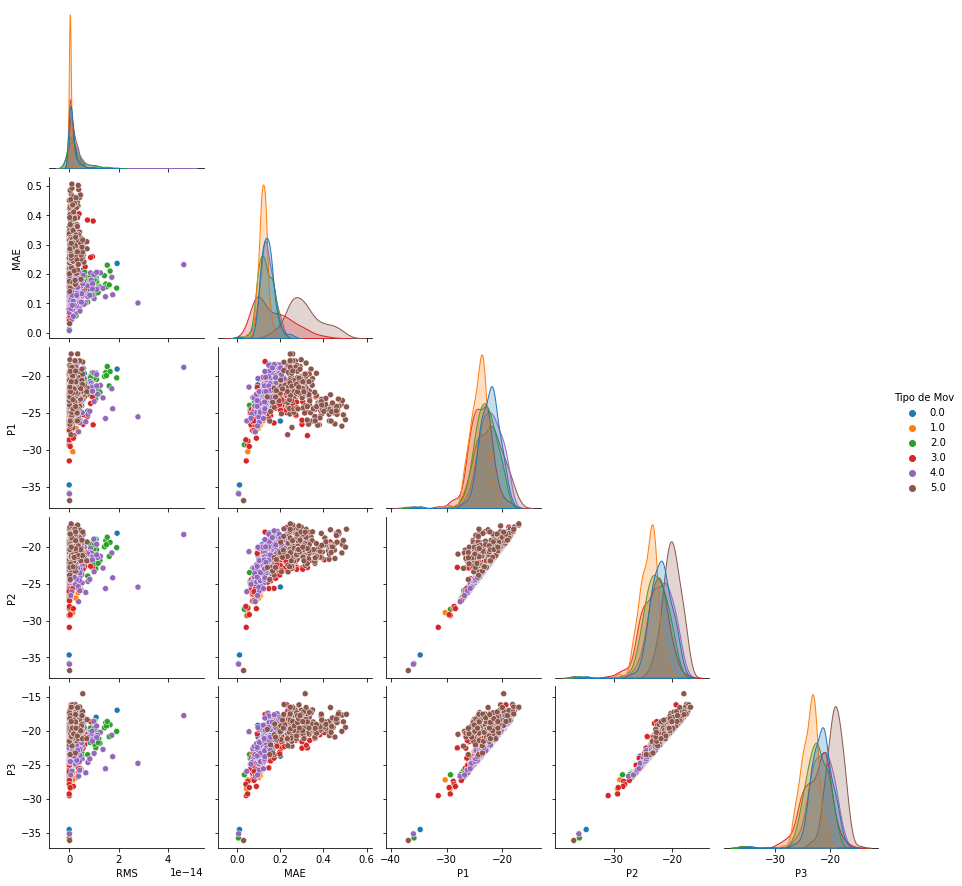

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

subDataFrame = dataFrame[['RMS','MAE','P1','P2','P3','Tipo de Mov']]
subSet = dataFrame
unique = subSet["Tipo de Mov"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
sns.pairplot(subDataFrame, hue = "Tipo de Mov",corner=True, palette=palette)


In [ ]:

N, D = dataFrame.shape
print('# Observations: ', N,'\t# Features: ',D)

# Observations:  1134 	# Features:  62


In [ ]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="poly", gamma=10, alpha=0.1
)

pca.fit(X_train)
X_test_pca = pca.transform(X_test) # Primero ajusta con Xtrain y transforma a Xtest
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

In [ ]:
print(y_test.shape)

(341,)


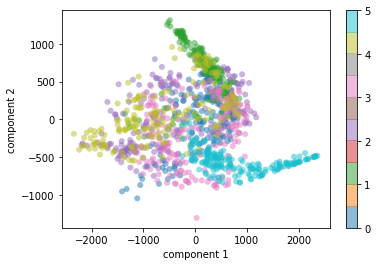

In [ ]:
plt.scatter(projectedZ[:, 0], projectedZ[:, 1],
             c=dataFrame['Tipo de Mov'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
import numpy as np

y= dataFrame['Tipo de Mov']
X_train, X_test= train_test_split(dataFrame,random_state=0, test_size=0.6)

In [ ]:
pca = PCA(n_components = 10)  # project from 64 to 2 dimensions
# Load ourdigits.data dataset X
X = dataFrame
projectedZ = pca.fit_transform(X)
BasisW = pca.components_
print('Input Space:',X.shape)
print('Latent Space:',projectedZ.shape)
print(pca.explained_variance_)
print(BasisW.shape)

Input Space: (1134, 62)
Latent Space: (1134, 10)
[6.91293531e+05 2.52804106e+05 9.78436652e+04 1.93304440e+03
 9.13657996e+02 7.62753572e+02 6.97808379e+02 4.60950241e+02
 4.24114972e+02 3.10827225e+02]
(10, 62)


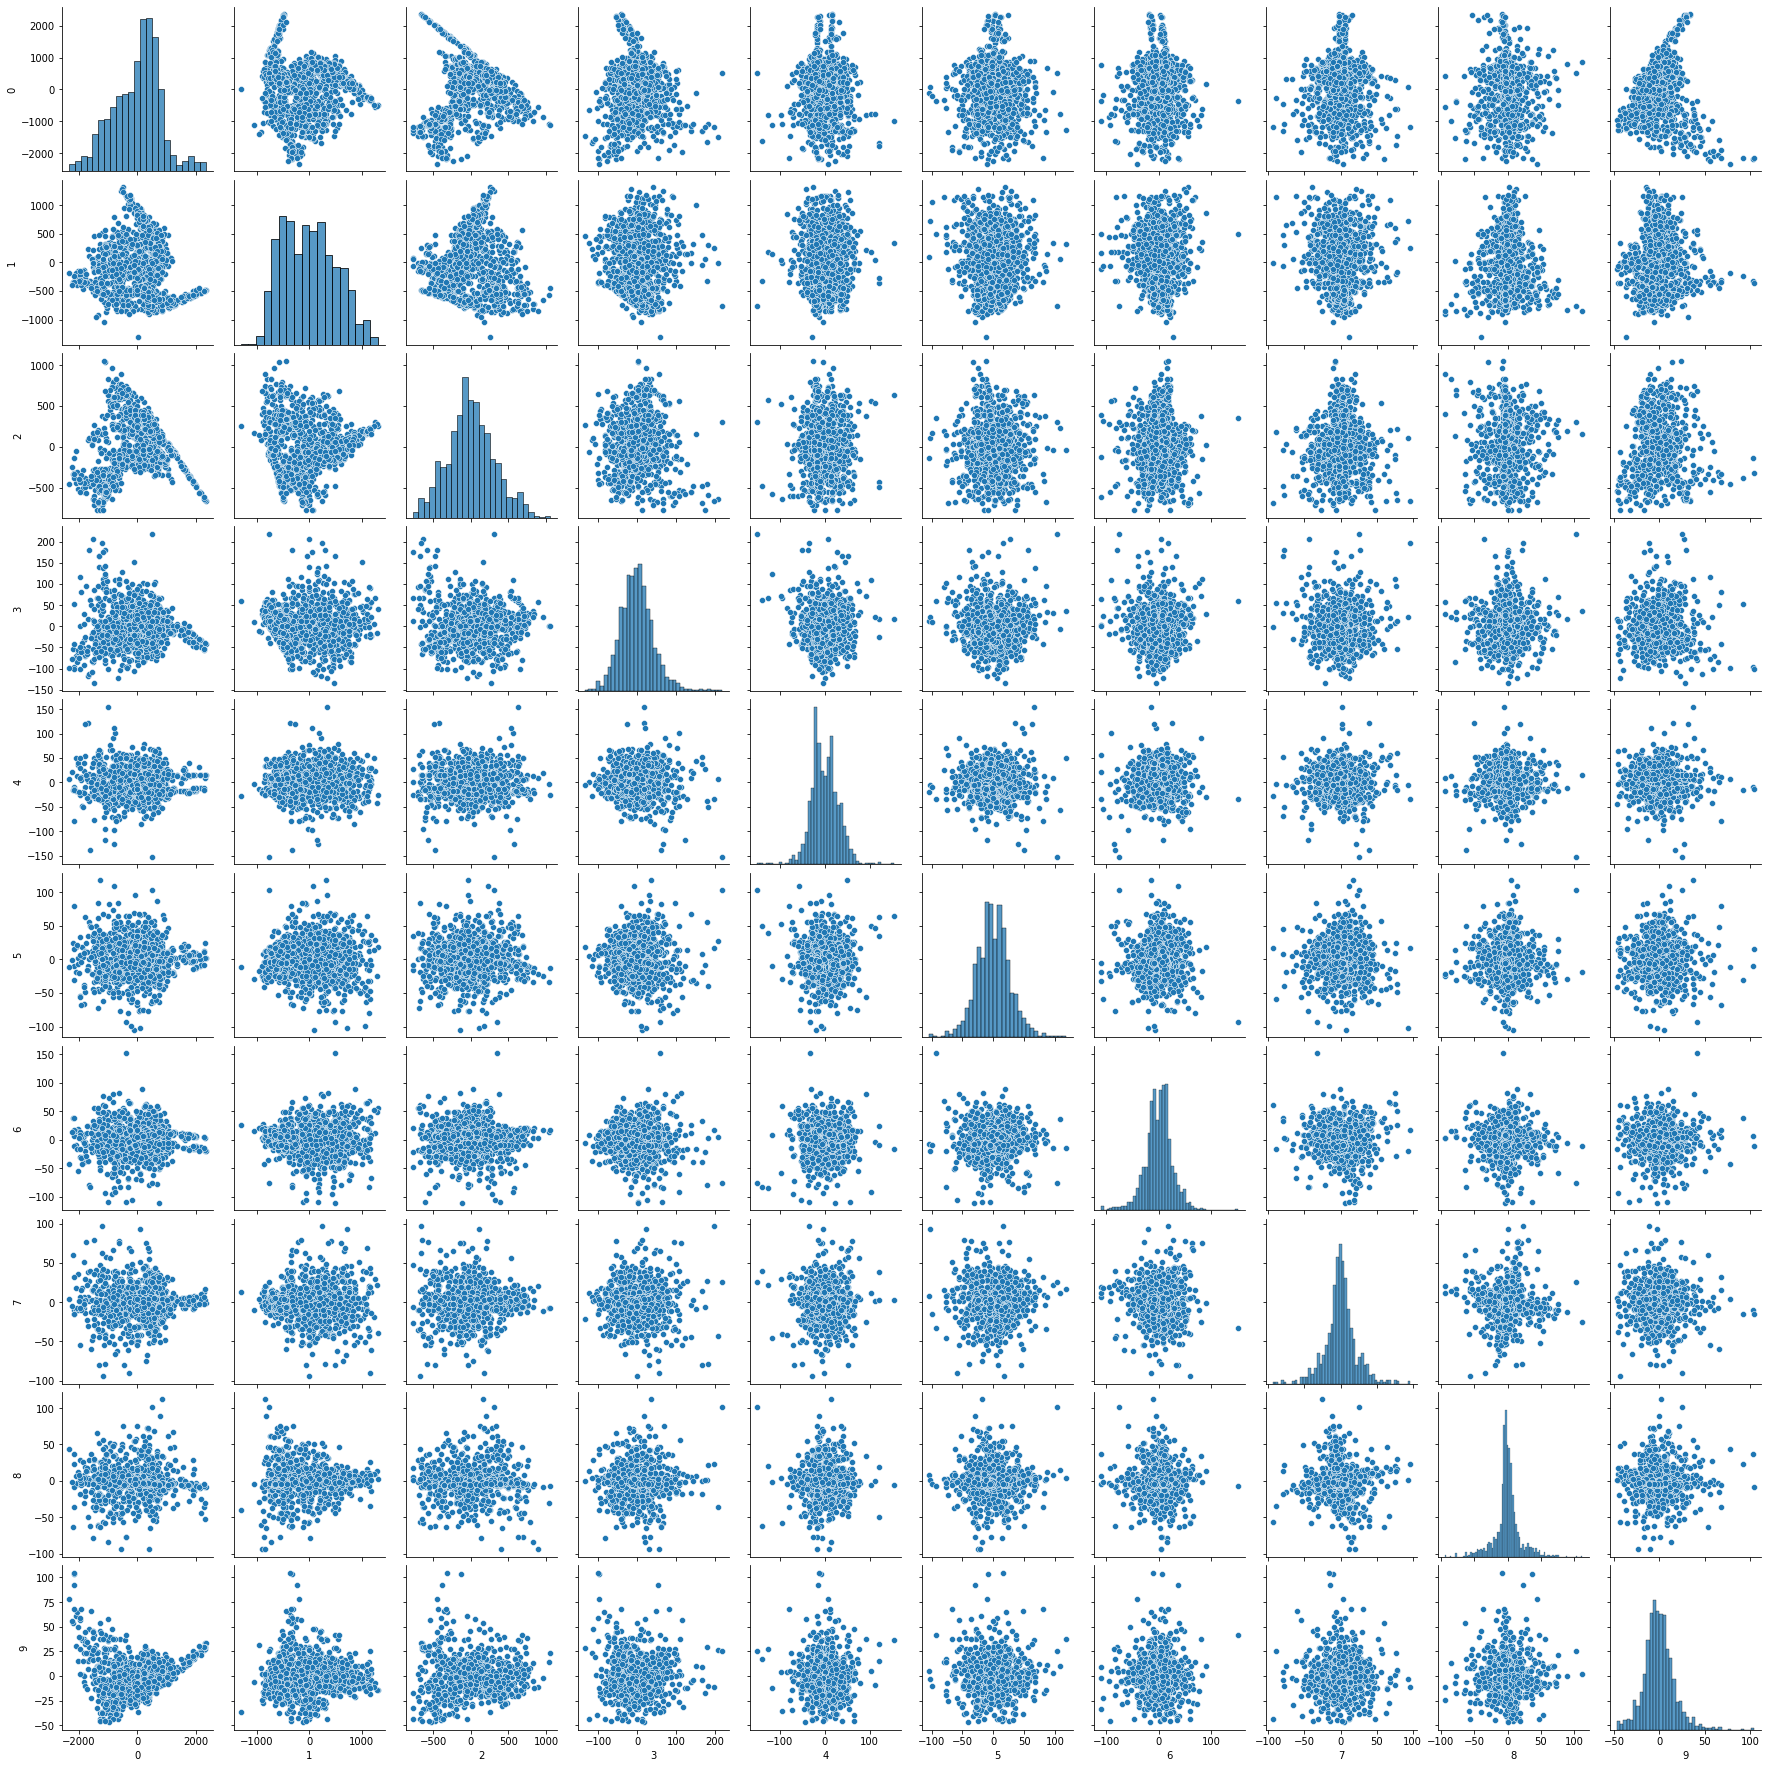

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dataFrame1= pd.DataFrame(data = projectedZ)
subSet = dataFrame1= pd.DataFrame(data = projectedZ)
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
sns.pairplot(subSet)

In [ ]:
dataFrame1

,0,1,2,3,4,5,6,7,8,9
0,-497.448098,407.605089,234.593561,-56.447037,-1.344572,-5.897659,-47.945017,-3.498144,-0.222864,1.069400
1,151.821525,253.615892,178.221433,-32.289216,34.560225,2.181462,-31.360275,8.288349,1.954738,-15.610115
2,342.687870,230.130062,119.658014,-30.199876,31.587501,2.303476,12.889161,-11.702284,-1.112838,-6.409320
3,422.287618,317.790701,61.716800,-31.739956,-9.751044,-49.442442,-26.099026,11.882214,-6.787516,-7.938150
4,385.046672,369.085949,60.263422,-26.554243,-35.999838,-28.985839,-6.998186,-9.331959,11.925504,-12.935136
...,...,...,...,...,...,...,...,...,...,...
1129,212.470905,-579.635412,386.019255,21.181811,48.487357,-3.274427,5.982951,0.513082,-2.905600,-22.872445
1130,573.598645,-654.750583,273.776701,34.639086,34.503795,16.432119,8.374026,5.390030,-3.806995,-5.597514
1131,-62.203570,-544.519763,388.394277,27.490463,39.782423,-5.911466,-8.512222,3.563092,-3.812741,-11.199499
1132,-10.731165,-556.529832,332.937572,27.481300,36.329563,13.045112,5.550935,-10.502714,75.050409,-0.161028


In [ ]:


from ipywidgets import interact
@interact(Flag_Space = ['Latent','Input'],kernel=['linear', 'poly', 'rbf', 'sigmoid', 'cosine', 'precomputed'],gamma=(0,1,0.1),alpha=(0,10,0.1))

def ExperimentoBayes(Flag_Space,kernel,gamma,alpha):
  if Flag_Space == 'Input':
    X = dataFrame
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
  else:
    X = dataFrame
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)


  # Instanciamos nuestro modelo Bayesiano
  clasificadorBayes = GaussianNB()
  clasificadorBayes.fit(X_train,y_train)

  # Realizar una prediccion
  y_pred = clasificadorBayes.predict(X_test)
  # Realizamo el análisis del erro
  error = np.sum(np.abs(y_pred-y_test))
  Acierto = 1.- error/len(y_test)
  # Analizar algo que se conoce como una matriz de confusión
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  CMAT = confusion_matrix(y_test,y_pred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(y_test)
  print('Acc(%): ',porcentajeAcierto)
  ax = ConfusionMatrixDisplay(CMAT,display_labels=['0','1','2','3','4','5'])
  ax.plot()
  plt.show()

interactive(children=(Dropdown(description='Flag_Space', options=('Latent', 'Input'), value='Latent'), Dropdow…